# **Skin Care Recommendation System**


Un système de recommandation est une technologie de filtrage de l'information qui prédit et suggère des éléments qu'un utilisateur pourrait trouver intéressants ou pertinents. Il utilise divers algorithmes et techniques pour analyser les données de l'utilisateur, les caractéristiques des articles et les interactions historiques afin de générer des recommandations pertinentes.


Il existe principalement deux types de systèmes de recommandation : le filtrage basé sur le contenu et le filtrage collaboratif.


* Filtrage basé sur le contenu :
Le filtrage basé sur le contenu recommande des articles sur la base des caractéristiques des articles eux-mêmes. Il analyse les attributs ou les métadonnées associés aux éléments et recommande des éléments similaires en fonction de leur contenu. Par exemple, si un utilisateur a montré de l'intérêt pour certains genres de films, un système de recommandation basé sur le contenu peut suggérer d'autres films de genre similaire.


* Filtrage collaboratif :
Le filtrage collaboratif recommande des éléments en fonction des préférences et du comportement d'utilisateurs similaires. Il tient compte de la sagesse collective d'un groupe d'utilisateurs pour fournir des recommandations. Le filtrage collaboratif peut être divisé en deux sous-types : le filtrage basé sur l'utilisateur et le filtrage basé sur l'élément. Le filtrage basé sur l'utilisateur suggère des articles à un utilisateur en fonction des préférences des utilisateurs ayant des goûts similaires. Le filtrage basé sur les articles, quant à lui, recommande des articles sur la base des similitudes entre les articles eux-mêmes.

Les systèmes de recommandation ont gagné en popularité dans divers domaines, notamment le commerce électronique, les loisirs, les médias sociaux, etc. Ils améliorent l'expérience de l'utilisateur, augmentent son engagement et génèrent des revenus commerciaux en permettant aux utilisateurs de découvrir des contenus pertinents et personnalisés.


Grâce aux progrès des techniques d'apprentissage automatique et d'analyse des données, les systèmes de recommandation continuent d'évoluer et de s'améliorer, en incorporant des algorithmes complexes et en tenant compte des commentaires des utilisateurs afin d'accroître leur précision et leur efficacité.



In [ ]:
!pip install markovify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 7.5 MB/s eta 0:00:00
  Created wheel for markovify: filename=markovify-0.9.4-py3-none-any.whl size=18605 sha256=5fa923d5d9379dbe7e720c7b56ef421d6261065cffa3c3766d5e43c0cda3253f
  Stored in directory: /root/.cache/pip/wheels/ca/8c/c5/41413e24c484f883a100c63ca7b3b0362b7c6f6eb6d7c9cc7f
Successfully built markovify


In [ ]:
# Importer les bibliothèques nécessaires

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity


import markovify
import string
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

import warnings; warnings.simplefilter('ignore')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df=pd.read_csv('/content/skindata.csv',index_col=[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8649 entries, 0 to 8648
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Username      8649 non-null   object 
 1   Skin_Tone     8649 non-null   object 
 2   Skin_Type     8649 non-null   object 
 3   Eye_Color     8649 non-null   object 
 4   Hair_Color    8649 non-null   object 
 5   Rating_Stars  8649 non-null   int64  
 6   Review        8649 non-null   object 
 7   Product       8649 non-null   object 
 8   Brand         8649 non-null   object 
 9   Price         8649 non-null   int64  
 10  Rating        8649 non-null   float64
 11  Ingredients   8649 non-null   object 
 12  Combination   8649 non-null   int64  
 13  Dry           8649 non-null   int64  
 14  Normal        8649 non-null   int64  
 15  Oily          8649 non-null   int64  
 16  Sensitive     8649 non-null   int64  
 17  Category      8649 non-null   object 
 18  Product_Url   8649 non-null 

In [ ]:
df.head(5)

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
0      allyp3    Medium  Combination     Brown   Brunette             5   
1      PatTea    Medium  Combination     Brown        Red             1   
2    Sabi1991   No data      No data   No data    No data             5   
3  happyface2      Fair          Dry      Blue     Blonde             5   
4    kimkix34      Fair       Normal     Green     Blonde             5   

                                              Review  \
0  This is hands down the best cleanser I’ve ever...   
1  Unfortunately this doesn’t work for everyone. ...   
2  My favorite cleanser!! i love the packaging on...   
3  I love all things Youth To The People! This cl...   
4  I had a trial size of this and was obsessed. M...   

                          Product                Brand  Price  ...  \
0  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...   
1  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...   
2  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...   
3  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...   
4  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...   

                                         Ingredients Combination  Dry  Normal  \
0  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...           0    0       0   
1  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...           0    0       0   
2  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...           0    0       0   
3  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...           0    0       0   
4  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...           0    0       0   

   Oily  Sensitive  Category  \
0     0          0  Cleanser   
1     0          0  Cleanser   
2     0          0  Cleanser   
3     0          0  Cleanser   
4     0          0  Cleanser   

                                         Product_Url User_id  Product_id  
0  https://www.sephora.com/product/kale-spinach-g...    3420         157  
1  https://www.sephora.com/product/kale-spinach-g...    2483         157  
2  https://www.sephora.com/product/kale-spinach-g...    2715         157  
3  https://www.sephora.com/product/kale-spinach-g...    4497         157  
4  https://www.sephora.com/product/kale-spinach-g...    5017         157  

[5 rows x 21 columns]

In [ ]:
df['Ingredients'] = df['Ingredients'].str.lower()

In [ ]:
df['Ingredients'][1245]

'water, glycerin, ethylhexylisononanoate, butylene glycol, pentylene glycol, propanediol,caprylyl methicone, isostearyl isostearate, dimethicone, behenylalcohol, nylon-6/12, steareth-2, xanthan gum, prunusdomestica seed oil, rosa damascena flower water, algin,angelica keiskei extract, acacia senegal gum, cucumis sativus(cucumber) fruit extract, rosa damascena flower oil, sodiumhyaluronate, tocopheryl acetate, ammonium acryloyldimethy-ltaurate/vp copolymer, steareth-21, polyacrylamide, c13-14isoparaffin, acrylates/c10-30 alkyl acrylate crosspolymer, tromethamine, dimethiconol, laureth-7, tetrasodium edta,caprylic/capric triglyceride, bht, caramel, serine, fragrance, phenoxyethanol, citronellol, geraniol.'

In [ ]:
df['Ingredients']

0       water, sodium cocoyl glutamate, cocamidopropyl...
1       water, sodium cocoyl glutamate, cocamidopropyl...
2       water, sodium cocoyl glutamate, cocamidopropyl...
3       water, sodium cocoyl glutamate, cocamidopropyl...
4       water, sodium cocoyl glutamate, cocamidopropyl...
                              ...                        
8644    water, dicaprylyl carbonate, niacinamide, cety...
8645    water, dicaprylyl carbonate, niacinamide, cety...
8646    water, dicaprylyl carbonate, niacinamide, cety...
8647    water, dicaprylyl carbonate, niacinamide, cety...
8648    water, dicaprylyl carbonate, niacinamide, cety...
Name: Ingredients, Length: 8649, dtype: object

In [ ]:
import re

# Function to modify the Ingredients column
def modify_ingredients(row):
    ingredients_string = row['Ingredients']
    
    # Remove unnecessary characters and split into a list
    ingredients_list = [ingredient.strip().lower() for ingredient in ingredients_string.split(',')]
    
    # Split compound ingredient names excluding numbers
    split_ingredients_list = []
    for ingredient in ingredients_list:
        split_ingredients = re.findall(r'[a-zA-Z]+', ingredient)
        split_ingredients_list.extend(split_ingredients)
    
    return split_ingredients_list

# Apply the modification to the Ingredients column
df['Ingredients_cleaned'] = df.apply(modify_ingredients, axis=1)
df['Ingredients_cleaned'][1245]

['water',
 'glycerin',
 'ethylhexylisononanoate',
 'butylene',
 'glycol',
 'pentylene',
 'glycol',
 'propanediol',
 'caprylyl',
 'methicone',
 'isostearyl',
 'isostearate',
 'dimethicone',
 'behenylalcohol',
 'nylon',
 'steareth',
 'xanthan',
 'gum',
 'prunusdomestica',
 'seed',
 'oil',
 'rosa',
 'damascena',
 'flower',
 'water',
 'algin',
 'angelica',
 'keiskei',
 'extract',
 'acacia',
 'senegal',
 'gum',
 'cucumis',
 'sativus',
 'cucumber',
 'fruit',
 'extract',
 'rosa',
 'damascena',
 'flower',
 'oil',
 'sodiumhyaluronate',
 'tocopheryl',
 'acetate',
 'ammonium',
 'acryloyldimethy',
 'ltaurate',
 'vp',
 'copolymer',
 'steareth',
 'polyacrylamide',
 'c',
 'isoparaffin',
 'acrylates',
 'c',
 'alkyl',
 'acrylate',
 'crosspolymer',
 'tromethamine',
 'dimethiconol',
 'laureth',
 'tetrasodium',
 'edta',
 'caprylic',
 'capric',
 'triglyceride',
 'bht',
 'caramel',
 'serine',
 'fragrance',
 'phenoxyethanol',
 'citronellol',
 'geraniol']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(use_idf=False)

# Fit and transform the cleaned Ingredients column
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Ingredients_cleaned'].apply(lambda x: ' '.join(x)))

# Extract the feature names (ingredient names) from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a list of ingredient names for each row
ingredient_lists = [', '.join([feature_names[idx] for idx in row.indices]) for row in tfidf_matrix]

# Add the ingredient names to the original DataFrame as a new column
df['Ing_Tfidf'] = ingredient_lists


In [ ]:
df['Ing_Tfidf'][1245]

'water, tocopheryl, acetate, butylene, glycol, extract, flower, fragrance, phenoxyethanol, caprylic, capric, triglyceride, glycerin, fruit, seed, oil, rosa, propanediol, cucumis, damascena, angelica, keiskei, xanthan, gum, bht, citronellol, geraniol, dimethicone, edta, pentylene, acrylates, copolymer, caprylyl, tetrasodium, laureth, sativus, cucumber, dimethiconol, acrylate, crosspolymer, alkyl, tromethamine, steareth, algin, polyacrylamide, isoparaffin, caramel, ammonium, vp, ethylhexylisononanoate, methicone, isostearyl, isostearate, behenylalcohol, nylon, prunusdomestica, acacia, senegal, sodiumhyaluronate, acryloyldimethy, ltaurate, serine'

In [ ]:
df.head(5)

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
0      allyp3    Medium  Combination     Brown   Brunette             5   
1      PatTea    Medium  Combination     Brown        Red             1   
2    Sabi1991   No data      No data   No data    No data             5   
3  happyface2      Fair          Dry      Blue     Blonde             5   
4    kimkix34      Fair       Normal     Green     Blonde             5   

                                              Review  \
0  This is hands down the best cleanser I’ve ever...   
1  Unfortunately this doesn’t work for everyone. ...   
2  My favorite cleanser!! i love the packaging on...   
3  I love all things Youth To The People! This cl...   
4  I had a trial size of this and was obsessed. M...   

                          Product                Brand  Price  ...  Dry  \
0  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...    0   
1  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...    0   
2  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...    0   
3  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...    0   
4  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...    0   

  Normal  Oily  Sensitive  Category  \
0      0     0          0  Cleanser   
1      0     0          0  Cleanser   
2      0     0          0  Cleanser   
3      0     0          0  Cleanser   
4      0     0          0  Cleanser   

                                         Product_Url  User_id Product_id  \
0  https://www.sephora.com/product/kale-spinach-g...     3420        157   
1  https://www.sephora.com/product/kale-spinach-g...     2483        157   
2  https://www.sephora.com/product/kale-spinach-g...     2715        157   
3  https://www.sephora.com/product/kale-spinach-g...     4497        157   
4  https://www.sephora.com/product/kale-spinach-g...     5017        157   

                                 Ingredients_cleaned  \
0  [water, sodium, cocoyl, glutamate, cocamidopro...   
1  [water, sodium, cocoyl, glutamate, cocamidopro...   
2  [water, sodium, cocoyl, glutamate, cocamidopro...   
3  [water, sodium, cocoyl, glutamate, cocamidopro...   
4  [water, sodium, cocoyl, glutamate, cocamidopro...   

                                           Ing_Tfidf  
0  water, sodium, cocoyl, glutamate, cocamidoprop...  
1  water, sodium, cocoyl, glutamate, cocamidoprop...  
2  water, sodium, cocoyl, glutamate, cocamidoprop...  
3  water, sodium, cocoyl, glutamate, cocamidoprop...  
4  water, sodium, cocoyl, glutamate, cocamidoprop...  

[5 rows x 23 columns]

## EDA and Data Visualization


Dans cette partie on a effectué des opérations d'exploration et de visualisation des données. On a regroupé les données en fonction de différentes colonnes, telles que 'Skin_Tone', 'Skin_Type', 'Eye_Color', 'Hair_Color', 'Rating_Stars', et tracer des graphiques à barres pour représenter les statistiques.

<Axes: xlabel='Skin_Tone'>

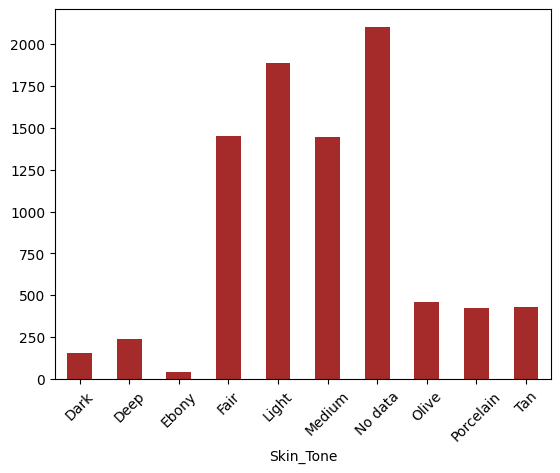

In [ ]:
skintone_stats=df.groupby('Skin_Tone')['Username'].count()
skintone_stats.plot.bar(color='brown',rot=45)

In [ ]:
skintype_stats=df.groupby('Skin_Type')['Username'].count()

<Axes: xlabel='Skin_Type'>

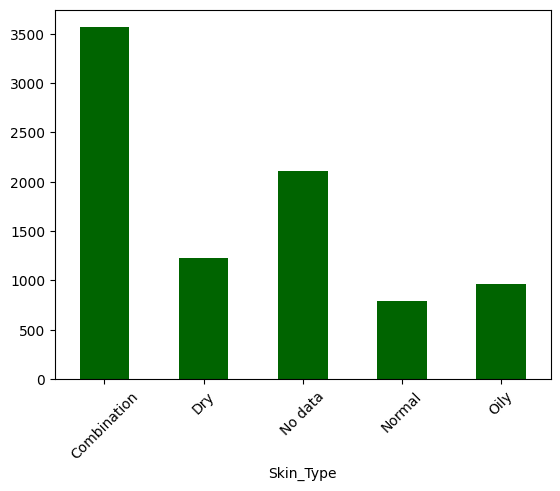

In [ ]:
skintype_stats.plot.bar(color='darkgreen',rot=45)

In [ ]:
eyecolor_stats=df.groupby('Eye_Color')['Username'].count()

<Axes: xlabel='Eye_Color'>

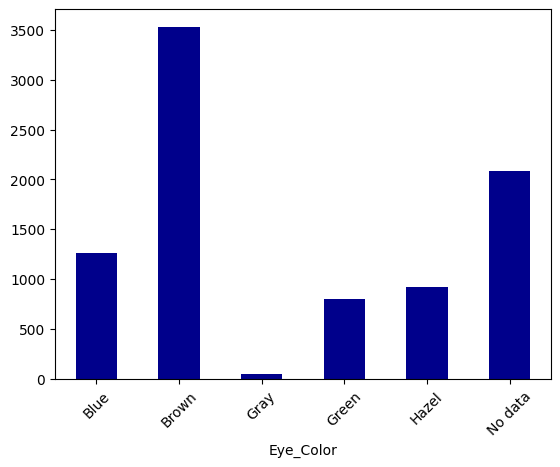

In [ ]:
eyecolor_stats.plot.bar(color='darkblue',rot=45)

In [ ]:
haircolor_stats=df.groupby('Hair_Color')['Username'].count()

<Axes: xlabel='Hair_Color'>

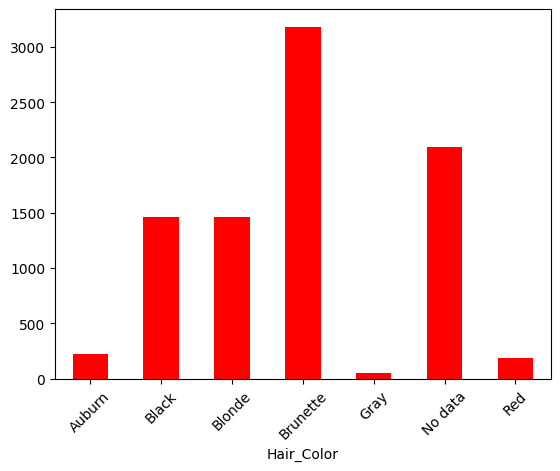

In [ ]:
haircolor_stats.plot.bar(color='red',rot=45)

<Axes: xlabel='Rating_Stars'>

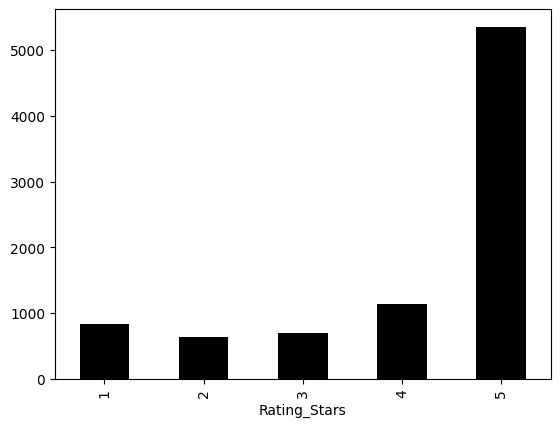

In [ ]:
rating_stats = df.groupby('Rating_Stars')['Username'].count()
rating_stats.plot.bar(color = 'black')

Un nuage de mots est généré à partir des critiques positives et négatives en utilisant la bibliothèque WordCloud.

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [ ]:
df.Rating_Stars.max()

5

In [ ]:
negativedf=df[df.Rating_Stars<=4]

In [ ]:
negativedf.head()

Username  Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
1         PatTea     Medium  Combination     Brown        Red             1   
5        TABrown    No data      No data   No data    No data             2   
6       britcorm  Porcelain         Oily      Blue   Brunette             1   
18  keyz2thejeep       Dark  Combination     Brown     Blonde             4   
20       Vani241      Olive         Oily     Brown      Black             3   

                                               Review  \
1   Unfortunately this doesn’t work for everyone. ...   
5   There is nothing great about this cleanser. I ...   
6   Been trying this cleanser for about 3 weeks no...   
18  Best cleaner I’ve ever used. Gets my face nice...   
20  There are Pros and Cons to this cleanser! This...   

                           Product                Brand  Price  ...  Dry  \
1   Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...    0   
5   Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...    0   
6   Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...    0   
18  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...    0   
20  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...    0   

   Normal  Oily  Sensitive  Category  \
1       0     0          0  Cleanser   
5       0     0          0  Cleanser   
6       0     0          0  Cleanser   
18      0     0          0  Cleanser   
20      0     0          0  Cleanser   

                                          Product_Url  User_id Product_id  \
1   https://www.sephora.com/product/kale-spinach-g...     2483        157   
5   https://www.sephora.com/product/kale-spinach-g...     3008        157   
6   https://www.sephora.com/product/kale-spinach-g...     3776        157   
18  https://www.sephora.com/product/kale-spinach-g...     4996        157   
20  https://www.sephora.com/product/kale-spinach-g...     3210        157   

                                  Ingredients_cleaned  \
1   [water, sodium, cocoyl, glutamate, cocamidopro...   
5   [water, sodium, cocoyl, glutamate, cocamidopro...   
6   [water, sodium, cocoyl, glutamate, cocamidopro...   
18  [water, sodium, cocoyl, glutamate, cocamidopro...   
20  [water, sodium, cocoyl, glutamate, cocamidopro...   

                                            Ing_Tfidf  
1   water, sodium, cocoyl, glutamate, cocamidoprop...  
5   water, sodium, cocoyl, glutamate, cocamidoprop...  
6   water, sodium, cocoyl, glutamate, cocamidoprop...  
18  water, sodium, cocoyl, glutamate, cocamidoprop...  
20  water, sodium, cocoyl, glutamate, cocamidoprop...  

[5 rows x 23 columns]

In [ ]:
positivedf=df[df.Rating_Stars>4]

In [ ]:
positivedf.head()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
0      allyp3    Medium  Combination     Brown   Brunette             5   
2    Sabi1991   No data      No data   No data    No data             5   
3  happyface2      Fair          Dry      Blue     Blonde             5   
4    kimkix34      Fair       Normal     Green     Blonde             5   
7     jenn887       Tan          Dry     Brown      Black             5   

                                              Review  \
0  This is hands down the best cleanser I’ve ever...   
2  My favorite cleanser!! i love the packaging on...   
3  I love all things Youth To The People! This cl...   
4  I had a trial size of this and was obsessed. M...   
7  loveeeeeee this cleanser. Leaves my skin smoot...   

                          Product                Brand  Price  ...  Dry  \
0  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...    0   
2  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...    0   
3  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...    0   
4  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...    0   
7  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...    0   

  Normal  Oily  Sensitive  Category  \
0      0     0          0  Cleanser   
2      0     0          0  Cleanser   
3      0     0          0  Cleanser   
4      0     0          0  Cleanser   
7      0     0          0  Cleanser   

                                         Product_Url  User_id Product_id  \
0  https://www.sephora.com/product/kale-spinach-g...     3420        157   
2  https://www.sephora.com/product/kale-spinach-g...     2715        157   
3  https://www.sephora.com/product/kale-spinach-g...     4497        157   
4  https://www.sephora.com/product/kale-spinach-g...     5017        157   
7  https://www.sephora.com/product/kale-spinach-g...     4742        157   

                                 Ingredients_cleaned  \
0  [water, sodium, cocoyl, glutamate, cocamidopro...   
2  [water, sodium, cocoyl, glutamate, cocamidopro...   
3  [water, sodium, cocoyl, glutamate, cocamidopro...   
4  [water, sodium, cocoyl, glutamate, cocamidopro...   
7  [water, sodium, cocoyl, glutamate, cocamidopro...   

                                           Ing_Tfidf  
0  water, sodium, cocoyl, glutamate, cocamidoprop...  
2  water, sodium, cocoyl, glutamate, cocamidoprop...  
3  water, sodium, cocoyl, glutamate, cocamidoprop...  
4  water, sodium, cocoyl, glutamate, cocamidoprop...  
7  water, sodium, cocoyl, glutamate, cocamidoprop...  

[5 rows x 23 columns]

In [ ]:
negative=" ".join(review for review in negativedf.Review)

In [ ]:
negative

'Unfortunately this doesn’t work for everyone. I used it once and woke up the nxt day with 5 pimples, used it again, and again, and again but woke up with more and more. Finally i couldn’t take it anymore, I stopped using it, went back to my cerave hydrating cleanser- and Bam! My skin was clearing up every day after that. I suggest getting the small bottle to try it out first. Remember everyone’s skin is very different.\n…read more There is nothing great about this cleanser. I got the small size bottle to try out and would certainly never spend my money to buy this. It did remove my makeup so this got 2 stars instead of one but it did nothing for my skin. In fact I had some uneven texture after using this for a while. There are much better cleansers out there. Been trying this cleanser for about 3 weeks now and it’s not for me. I’m so glad I only bought the small bottle as this product broke me out. It’s the only new product in my routine so I know it is this one causing the break outs

In [ ]:
positive=" ".join(review for review in positivedf.Review)

In [ ]:
positive

'This is hands down the best cleanser I’ve ever used. I originally got it in the mini bottle at checkout on a whim and was shocked by how much it cleared my skin up. I bought the big bottle and haven’t looked back since, now this is the only cleanser I’ll use. I used to get little pimples all over my forehead and ever since I started using this (a year ago) they went away and haven’t returned. While I can’t speak for everyone’s skin, this was a miracle product for clearing my complexion and soothes my facial redness each time I use it. Im in love.\n…read more My favorite cleanser!! i love the packaging on this even tho my first bottle slipped out of my hands lol I love all things Youth To The People! This cleanser smells fresh and light, the ingredients are fantastic, and they are cruelty-free! (A quick google search of any brand will tell you if they\'re actually cruelty-free, don\'t just trust what a company says on its site, there are very loose rules about a company being able to c

In [ ]:
stopwords=set(STOPWORDS)

In [ ]:
stopwords.update(['read','more','product'])

In [ ]:
def generate_wordcloud(data):
    wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate(data)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

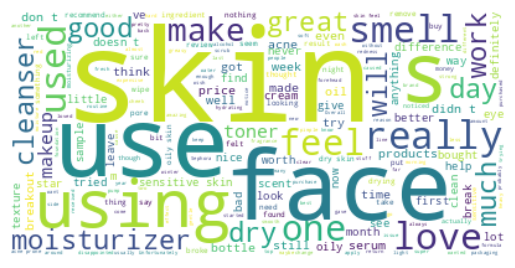

In [ ]:
generate_wordcloud(negative)

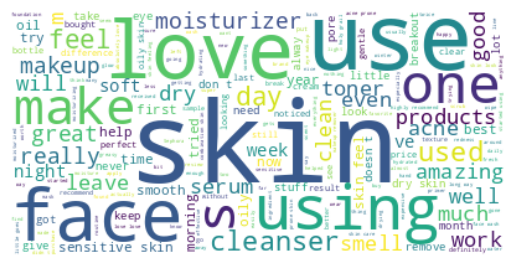

In [ ]:
generate_wordcloud(positive)

In [ ]:
df['Category'].value_counts()

Cleanser       4117
Moisturizer    2560
Treatment      1948
Face Mask        24
Name: Category, dtype: int64

In [ ]:
moist_df=df[df.Category=='Moisturizer']

In [ ]:
cleanse_df=df[df.Category=='Cleanser']

In [ ]:
mask_df=df[df.Category=='Face Mask']

In [ ]:
treat_df=df[df.Category=='Treatment']

In [ ]:
moist=" ".join(ing for ing in moist_df.Ing_Tfidf)

In [ ]:
moist

'water, leaf, extract, flower, fragrance, potassium, benzoate, glycerin, benzyl, alcohol, fruit, limonene, tocopherol, oil, rosa, damascena, parfum, citronellol, geraniol, mentha, piperita, peppermint, citrus, aurantium, amara, bitter, orange, rosmarinus, officinalis, rosemary, alum, styrax, tonkinensis, resin, commiphora, myrrha, melissa, balm, mint, vitis, vinifera, grape, citral, linalool, farnesol, eugenol, plant, origin water, leaf, extract, flower, fragrance, potassium, benzoate, glycerin, benzyl, alcohol, fruit, limonene, tocopherol, oil, rosa, damascena, parfum, citronellol, geraniol, mentha, piperita, peppermint, citrus, aurantium, amara, bitter, orange, rosmarinus, officinalis, rosemary, alum, styrax, tonkinensis, resin, commiphora, myrrha, melissa, balm, mint, vitis, vinifera, grape, citral, linalool, farnesol, eugenol, plant, origin water, leaf, extract, flower, fragrance, potassium, benzoate, glycerin, benzyl, alcohol, fruit, limonene, tocopherol, oil, rosa, damascena, par

In [ ]:
cleanse=" ".join(ing for ing in cleanse_df.Ing_Tfidf)

In [ ]:
cleanse

'water, sodium, cocoyl, glutamate, cocamidopropyl, betaine, panthenol, vitamin, tocopheryl, acetate, ascorbic, acid, butylene, glycol, brassica, oleracea, kale, leaf, extract, spinacia, spinach, camellia, sinensis, green, tea, chamomilla, recutita, matricaria, flower, medicago, sativa, alfalfa, aloe, barbadensis, vera, natural, fragrance, lecithin, hydroxypropylmethylcellulose, phenoxyethanol, potassium, sorbate, benzoate, chlorophyll water, sodium, cocoyl, glutamate, cocamidopropyl, betaine, panthenol, vitamin, tocopheryl, acetate, ascorbic, acid, butylene, glycol, brassica, oleracea, kale, leaf, extract, spinacia, spinach, camellia, sinensis, green, tea, chamomilla, recutita, matricaria, flower, medicago, sativa, alfalfa, aloe, barbadensis, vera, natural, fragrance, lecithin, hydroxypropylmethylcellulose, phenoxyethanol, potassium, sorbate, benzoate, chlorophyll water, sodium, cocoyl, glutamate, cocamidopropyl, betaine, panthenol, vitamin, tocopheryl, acetate, ascorbic, acid, butylen

In [ ]:
mask=" ".join(ing for ing in mask_df.Ing_Tfidf)

In [ ]:
mask

'water, sodium, acid, butylene, glycol, extract, sativa, fragrance, lecithin, phenoxyethanol, glycerin, alcohol, ethylhexylglycerin, glyceryl, glucoside, fruit, cetearyl, seed, peg, polysorbate, taurate, propanediol, dextrin, xanthan, gum, cyclopentasiloxane, dimethicone, edta, palmitic, disodium, copolymer, hydrogenated, avena, oat, kernel, acrylate, crosspolymer, squalane, alcohols, adenosine, dipalmitoyl, hydroxyproline, cyclohexasiloxane, bis, ether, vinyl, caprylate, hibiscus, hydroxyethyl, cocoa, acryloyldimethyl, hdi, ceratonia, siliqua, carob, abelmoschus, tillandsia, usneoides, theobroma, cacao, pvp, decyltetradeceth water, sodium, acid, butylene, glycol, extract, sativa, fragrance, lecithin, phenoxyethanol, glycerin, alcohol, ethylhexylglycerin, glyceryl, glucoside, fruit, cetearyl, seed, peg, polysorbate, taurate, propanediol, dextrin, xanthan, gum, cyclopentasiloxane, dimethicone, edta, palmitic, disodium, copolymer, hydrogenated, avena, oat, kernel, acrylate, crosspolymer,

In [ ]:
treat=" ".join(ing for ing in treat_df.Ing_Tfidf)

In [ ]:
treat

'water, sodium, betaine, tocopheryl, acetate, ascorbic, acid, butylene, glycol, extract, flower, phenoxyethanol, caprylic, capric, triglyceride, glycerin, fruit, cetearyl, oil, polysorbate, urea, propyl, hyaluronate, ppg, lactate, gluconate, linalool, dimethicone, edta, stearic, chlorphenesin, lavender, anthemis, nobilis, disodium, pentylene, cetyl, acrylates, caprylyl, hydrogenated, polymethylsilsesquioxane, acrylate, crosspolymer, alkyl, trisodium, zinc, pca, trehalose, bis, olivate, sorbitan, palmitoyl, yeast, ethylhexanoate, collagen, olive, amino, acids, inositol, apple, tripeptide, unsaponifiables, taurine, chitosan, ethylenediamine, disuccinate, honey, aminomethyl, propanol, neopentanoate, watermelon, neopentyl, gallate, esculenta, lentil, isodecyl, diethylhexanoate, isobutyl, alaria, codium, tomentosum water, sodium, betaine, tocopheryl, acetate, ascorbic, acid, butylene, glycol, extract, flower, phenoxyethanol, caprylic, capric, triglyceride, glycerin, fruit, cetearyl, oil, po

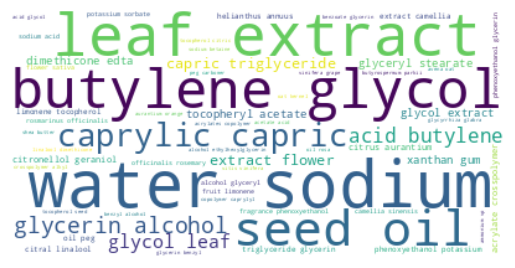

In [ ]:
generate_wordcloud(moist)

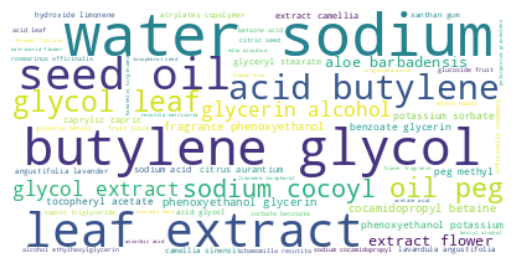

In [ ]:
generate_wordcloud(cleanse)

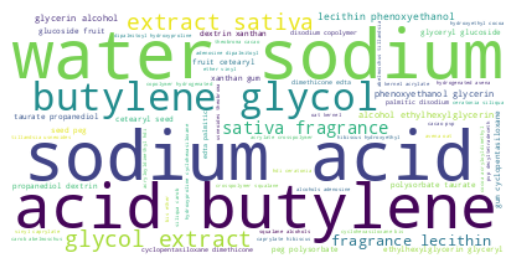

In [ ]:
generate_wordcloud(mask)

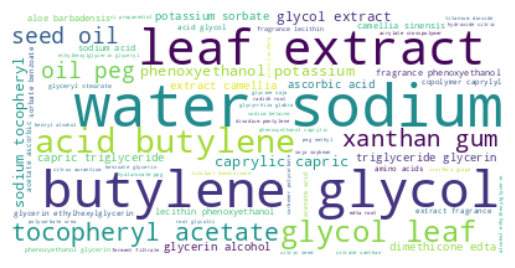

In [ ]:
generate_wordcloud(treat)

## Content based recommendation 

Des recommandations de produits basées sur les caractéristiques de l'utilisateur (teint de peau, couleur des yeux, type de peau, couleur des cheveux) sont fournies en filtrant le DataFrame en fonction de ces caractéristiques et en classant les produits en fonction de leur notation.

In [ ]:
def recommend_products_by_user_features(skintone,eyecolor,skintype,haircolor):
    ddf=df[(df['Skin_Tone']==skintone) & (df['Eye_Color']==eyecolor) &(df['Skin_Type']==skintype) & (df['Hair_Color']==haircolor)]
    recommendations=ddf[(ddf['Rating_Stars'].notnull())][['Rating_Stars','Product_Url','Product']]
    recommendations=recommendations.sort_values('Rating_Stars',ascending=False).head(10)
    print('Based on your features, these are the top products for you')
    return recommendations
    

In [ ]:
skintone=str(input('Enter Skin Tone'))
eyecolor=str(input('Enter Eye Color'))
skintype=str(input('Enter Skin Type'))
haircolor=str(input('Enter Hair Color'))

Enter Skin ToneFair
Enter Eye ColorBrown
Enter Skin TypeOily
Enter Hair ColorBlack


In [ ]:
recommend_products_by_user_features(skintone,eyecolor,skintype,haircolor)

Based on your features, these are the top products for you


Rating_Stars                                        Product_Url  \
1944             5  https://www.sephora.com/product/the-moisturizi...   
3293             5  https://www.sephora.com/product/find-your-bala...   
5881             5  https://www.sephora.com/product/plantscription...   
6517             5  https://www.sephora.com/product/fab-skin-lab-r...   
1760             4  https://www.sephora.com/product/water-bank-moi...   
5262             4  https://www.sephora.com/product/supercleanse-t...   
145              2  https://www.sephora.com/product/beste-no-9-jel...   
169              2  https://www.sephora.com/product/beste-no-9-jel...   

                                                Product  
1944                    The Moisturizing Cool Gel Cream  
3293            Find Your Balance™ Oil Control Cleanser  
5881                Plantscription™ Anti-Aging Cleanser  
6517  FAB Skin Lab Retinol Serum 0.25% Pure Concentrate  
1760                          Water Bank Moisture Cream  
5262      SUPERCLEANSE™ Clearing Cream-to-Foam Cleanser  
145                         Beste™ No. 9 Jelly Cleanser  
169                         Beste™ No. 9 Jelly Cleanser

## Cosine similarity

La définition de la similitude entre deux vecteurs u et v est  le rapport entre leur produit en points et le produit de leurs grandeurs.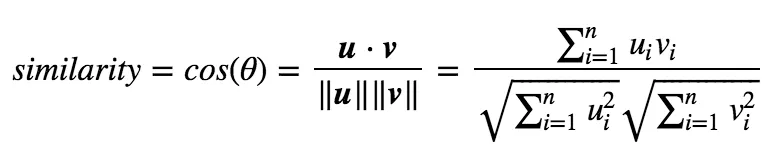

En appliquant la définition de la similitude, celle-ci sera en effet égale à 1 si les deux vecteurs sont identiques, et elle sera égale à 0 si les deux vecteurs sont orthogonaux. En d'autres termes, la similitude est un nombre borné entre 0 et 1 qui nous indique à quel point les deux vecteurs sont similaires.

In [ ]:
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity

In [ ]:
df_cont=df[['Product','Product_id','Ingredients','Product_Url','Ing_Tfidf','Rating']]

In [ ]:
df_cont.head()

Product  Product_id  \
0  Superfood Antioxidant Cleanser         157   
1  Superfood Antioxidant Cleanser         157   
2  Superfood Antioxidant Cleanser         157   
3  Superfood Antioxidant Cleanser         157   
4  Superfood Antioxidant Cleanser         157   

                                         Ingredients  \
0  water, sodium cocoyl glutamate, cocamidopropyl...   
1  water, sodium cocoyl glutamate, cocamidopropyl...   
2  water, sodium cocoyl glutamate, cocamidopropyl...   
3  water, sodium cocoyl glutamate, cocamidopropyl...   
4  water, sodium cocoyl glutamate, cocamidopropyl...   

                                         Product_Url  \
0  https://www.sephora.com/product/kale-spinach-g...   
1  https://www.sephora.com/product/kale-spinach-g...   
2  https://www.sephora.com/product/kale-spinach-g...   
3  https://www.sephora.com/product/kale-spinach-g...   
4  https://www.sephora.com/product/kale-spinach-g...   

                                           Ing_Tfidf  Rating  
0  water, sodium, cocoyl, glutamate, cocamidoprop...     4.4  
1  water, sodium, cocoyl, glutamate, cocamidoprop...     4.4  
2  water, sodium, cocoyl, glutamate, cocamidoprop...     4.4  
3  water, sodium, cocoyl, glutamate, cocamidoprop...     4.4  
4  water, sodium, cocoyl, glutamate, cocamidoprop...     4.4

In [ ]:
df_cont.drop_duplicates(inplace=True)

In [ ]:
tf=TfidfVectorizer(analyzer='word',ngram_range=(1,2),min_df=0,stop_words='english')

In [ ]:
tfidf_matrix=tf.fit_transform(df_cont['Ingredients'])

In [ ]:
cosine_sim=linear_kernel(tfidf_matrix,tfidf_matrix)

In [ ]:
df_cont.head()

Product  Product_id  \
0           Superfood Antioxidant Cleanser         157   
48           Cleansing & Exfoliating Wipes          65   
96             Purity Made Simple Cleanser         210   
144            Beste™ No. 9 Jelly Cleanser          35   
192  The Rice Polish Foaming Enzyme Powder         196   

                                           Ingredients  \
0    water, sodium cocoyl glutamate, cocamidopropyl...   
48   water, caprylic/capric triglyceride, fragrance...   
96   water, sodium lauroamphoacetate, sodium tridec...   
144  water, sodium lauroyl methyl isethionate, glyc...   
192  microcrystalline cellulose, oryza sativa (rice...   

                                           Product_Url  \
0    https://www.sephora.com/product/kale-spinach-g...   
48   https://www.sephora.com/product/cleansing-exfo...   
96   https://www.sephora.com/product/purity-made-si...   
144  https://www.sephora.com/product/beste-no-9-jel...   
192  https://www.sephora.com/product/polished-rice-...   

                                             Ing_Tfidf  Rating  
0    water, sodium, cocoyl, glutamate, cocamidoprop...     4.4  
48   water, sodium, acid, fragrance, phenoxyethanol...     4.5  
96   water, sodium, acid, extract, flower, sativa, ...     4.5  
144  water, sodium, cocamidopropyl, betaine, acid, ...     4.1  
192  sodium, glutamate, betaine, leaf, camellia, si...     4.4

In [ ]:
df_cont.reset_index(drop=True)

Product  Product_id  \
0                       Superfood Antioxidant Cleanser         157   
1                        Cleansing & Exfoliating Wipes          65   
2                          Purity Made Simple Cleanser         210   
3                          Beste™ No. 9 Jelly Cleanser          35   
4                The Rice Polish Foaming Enzyme Powder         196   
..                                                 ...         ...   
310      Midnight Secret Late Night Recovery Treatment         173   
311                      Post-Acne Spot Lightening Gel         198   
312    Hydro-Plumping Re-Texturizing Serum Concentrate         150   
313                 The Microdelivery Resurfacing Peel         266   
314  Ferulic + Retinol Wrinkle Recovery Overnight S...         124   

                                           Ingredients  \
0    water, sodium cocoyl glutamate, cocamidopropyl...   
1    water, caprylic/capric triglyceride, fragrance...   
2    water, sodium lauroamphoacetate, sodium tridec...   
3    water, sodium lauroyl methyl isethionate, glyc...   
4    microcrystalline cellulose, oryza sativa (rice...   
..                                                 ...   
310                        visit the guerlain boutique   
311  water, alcohol denat., glycolic acid, butylene...   
312  water, glycerin, dimethicone, propanediol, dim...   
313  the microdelivery peel step i:\r\r\npeg-6, sod...   
314  water, dicaprylyl carbonate, niacinamide, cety...   

                                           Product_Url  \
0    https://www.sephora.com/product/kale-spinach-g...   
1    https://www.sephora.com/product/cleansing-exfo...   
2    https://www.sephora.com/product/purity-made-si...   
3    https://www.sephora.com/product/beste-no-9-jel...   
4    https://www.sephora.com/product/polished-rice-...   
..                                                 ...   
310  https://www.sephora.com/product/midnight-secre...   
311  https://www.sephora.com/product/post-acne-spot...   
312  https://www.sephora.com/product/hydro-plumping...   
313  https://www.sephora.com/product/the-microdeliv...   
314  https://www.sephora.com/product/ferulic-retino...   

                                             Ing_Tfidf  Rating  
0    water, sodium, cocoyl, glutamate, cocamidoprop...     4.4  
1    water, sodium, acid, fragrance, phenoxyethanol...     4.5  
2    water, sodium, acid, extract, flower, sativa, ...     4.5  
3    water, sodium, cocamidopropyl, betaine, acid, ...     4.1  
4    sodium, glutamate, betaine, leaf, camellia, si...     4.4  
..                                                 ...     ...  
310                     visit, the, boutique, guerlain     4.2  
311  water, sodium, acid, butylene, glycol, leaf, e...     3.7  
312  water, sodium, acid, butylene, glycol, leaf, e...     4.7  
313  water, sodium, tocopheryl, acetate, acid, glyc...     4.7  
314  water, sodium, acid, butylene, glycol, leaf, e...     4.4  

[315 rows x 6 columns]

In [ ]:
titles=df_cont[['Product','Ing_Tfidf','Rating']]

In [ ]:
titles.head()

Product  \
0           Superfood Antioxidant Cleanser   
48           Cleansing & Exfoliating Wipes   
96             Purity Made Simple Cleanser   
144            Beste™ No. 9 Jelly Cleanser   
192  The Rice Polish Foaming Enzyme Powder   

                                             Ing_Tfidf  Rating  
0    water, sodium, cocoyl, glutamate, cocamidoprop...     4.4  
48   water, sodium, acid, fragrance, phenoxyethanol...     4.5  
96   water, sodium, acid, extract, flower, sativa, ...     4.5  
144  water, sodium, cocamidopropyl, betaine, acid, ...     4.1  
192  sodium, glutamate, betaine, leaf, camellia, si...     4.4

In [ ]:
indices=pd.Series(df_cont.index,index=df_cont['Product'])

In [ ]:
indices

Product
Superfood Antioxidant Cleanser                           0
Cleansing & Exfoliating Wipes                           48
Purity Made Simple Cleanser                             96
Beste™ No. 9 Jelly Cleanser                            144
The Rice Polish Foaming Enzyme Powder                  192
                                                      ... 
Midnight Secret Late Night Recovery Treatment         8533
Post-Acne Spot Lightening Gel                         8556
Hydro-Plumping Re-Texturizing Serum Concentrate       8580
The Microdelivery Resurfacing Peel                    8603
Ferulic + Retinol Wrinkle Recovery Overnight Serum    8626
Length: 315, dtype: int64

In [ ]:
indices['Superfood Antioxidant Cleanser']

0

In [ ]:
def content_recommendation(product):
    idx=indices[product]
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)
    sim_scores=sim_scores[1:11]
    product_indices=[i[0] for i in sim_scores]
    return titles.iloc[product_indices]
    

In [ ]:
content_recommendation('The Rice Polish Foaming Enzyme Powder')

Product  \
7969             Water Drench Hyaluronic Cloud Serum   
1440             Water Drench Hyaluronic Cloud Cream   
2037                      Nutrient-Charged Water Gel   
5586                          Problem Solution Toner   
1080                The True Cream Moisturizing Bomb   
6726  Skin Rescue Acne Clearing Pads with White Clay   
4522                       Deep Cleansing Exfoliator   
3426                                 Treatment Toner   
1728                   Superberry Hydrate + Glow Oil   
1512         Goodnight Glow Retin-ALT Sleeping Crème   

                                              Ing_Tfidf  Rating  
7969  water, sodium, acid, butylene, glycol, leaf, e...     4.2  
1440  water, sodium, acid, butylene, glycol, leaf, e...     4.4  
2037  water, sodium, betaine, tocopheryl, acetate, a...     4.6  
5586  water, sodium, panthenol, acid, butylene, glyc...     4.3  
1080  water, panthenol, acid, glycol, leaf, extract,...     4.6  
6726  water, sodium, acid, butylene, glycol, leaf, e...     4.2  
4522  water, sodium, acid, glycol, extract, fragranc...     4.6  
3426  water, sodium, butylene, glycol, leaf, extract...     4.4  
1728  vitamin, oleracea, leaf, extract, natural, fra...     4.8  
1512  water, sodium, panthenol, acid, leaf, extract,...     4.3

# **Déploiement de système de recommandation**

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

In [ ]:
import gradio as gr
import pandas as pd

In [ ]:
# Définir l'interface d'entrée
product_input = gr.inputs.Textbox(label="Product Name")

In [ ]:
# Définir l'interface de sortie
output_dataframe = gr.outputs.Dataframe(type='pandas')

In [ ]:
# Créer l'interface Gradio
iface = gr.Interface(fn=content_recommendation, inputs=product_input, outputs=output_dataframe, title="Skincare Product Recommendation System")

In [ ]:
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1ac07f5dde093a6c2b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
